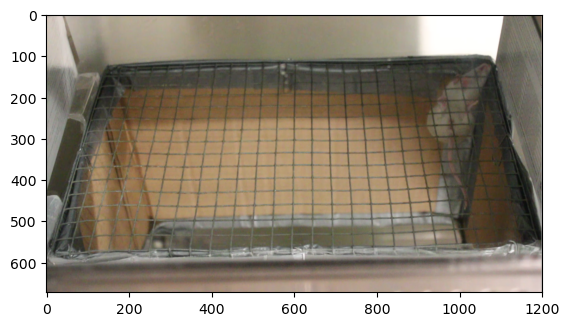

In [2]:
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt

tnia_images_path = Path(r"D:\images")
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2024_05_03_grid')
im_name = '6AMAH2b.png'

img = imread(parent_path / im_name)

plt.imshow(img)



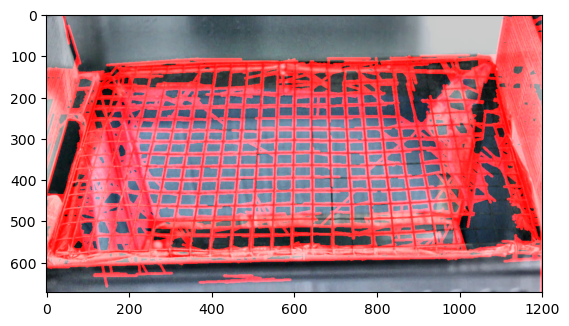

In [32]:
import cv2
import numpy as np

img = cv2.imread(str(parent_path / im_name), 1)

# Converting to LAB color space
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)

# Applying CLAHE to L-channel
clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8, 8))
cl = clahe.apply(l_channel)

clahe2 = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8, 8))
cl2 = clahe2.apply(a)

# Merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl, a, b))

# Converting image from LAB Color model to BGR color space
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Convert the enhanced image to grayscale
gray = cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

# Apply Canny edge detection
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(gray, low_threshold, high_threshold)
edges2 = cv2.Canny(cl2, 120, 140)

# Set parameters for Hough transform
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments

# Create a blank image to draw lines on
line_image = np.copy(img) * 0

# Run Hough transform on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

# Draw the filtered lines on the blank image
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

# Combine the original enhanced image with the line image
result = cv2.addWeighted(enhanced_img, 0.8, line_image, 1, 0)
#print(len(filtered_lines))

# Display the result
plt.imshow(result)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [33]:
import napari
viewer = napari.Viewer()

#viewer.add_image(l_channel, name='l_channel')
#viewer.add_image(cl, name='clahe')
viewer.add_image(a, name='a')
viewer.add_image(cl2, name='clahe2')
viewer.add_image(b, name='b')
#viewer.add_image(limg, name='limg')


viewer.add_image(img, name = 'img')
viewer.add_image(gray, name='gray')
viewer.add_image(edges, name='edges')
viewer.add_image(edges2, name='edges2')

<Image layer 'edges2' at 0x1fceb927fa0>

In [29]:
help(cv2.Canny)

Help on built-in function Canny:

Canny(...)
    Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
    .   @brief Finds edges in an image using the Canny algorithm @cite Canny86 .
    .   
    .   The function finds edges in the input image and marks them in the output map edges using the
    .   Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The
    .   largest value is used to find initial segments of strong edges. See
    .   <http://en.wikipedia.org/wiki/Canny_edge_detector>
    .   
    .   @param image 8-bit input image.
    .   @param edges output edge map; single channels 8-bit image, which has the same size as image .
    .   @param threshold1 first threshold for the hysteresis procedure.
    .   @param threshold2 second threshold for the hysteresis procedure.
    .   @param apertureSize aperture size for the Sobel operator.
    .   @param L2gradient a flag, indicating whether a more accurate \

In [34]:
from skimage.io import imsave

imsave(parent_path / 'cl2.png', cl2)

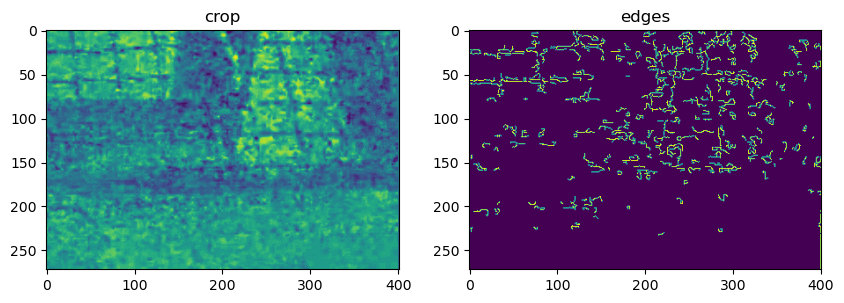

In [59]:

from tnia.plotting.plt_helper import imshow_multi2d

index = np.s_[400:,800:]
cl_crop = cl2[index]

edges2 = cv2.Canny(cl_crop, 50, 100)

fig = imshow_multi2d([cl_crop, edges2], ['crop', 'edges'], 1, 2, 10, 8)

In [60]:
viewer= napari.Viewer()
viewer.add_image(cl_crop, name='crop')
viewer.add_labels(edges2, name='edges')

<Labels layer 'edges' at 0x1fcf31cc850>